# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
17

17

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [39]:
'''Importing libraries'''
import pandas as pd
from sklearn.dummy import DummyClassifier, DummyRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config("figure")
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
confusion_matrix, ConfusionMatrixDisplay)
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time





In [70]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment_17_1/data/bank-additional-full.csv', sep = ';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [6]:
# df.info()
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
"""Business Objective:
Find a model that can predict if a client will subscribe to a term deposit by
identifying the main characteristics that affect success."""

'Business Objective:\nFind a model that can predict if a client will subscribe to a term deposit by\nidentifying the main characteristics that affect success.'

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [122]:
'''Creating a dataset without unused columns'''
bank_data = df[['age','job','marital','education','default','housing','loan',
                'y']]

# Reducing dataset size to speed up processing
sampled_bank_data = bank_data.sample(n=20000, random_state=42)
# bank_data.head()
sampled_bank_data.describe()


,age
count,20000.000000
mean,40.078300
std,10.401984
min,17.000000
25%,32.000000
50%,38.000000
75%,47.000000
max,98.000000


<Axes: xlabel='age', ylabel='Count'>

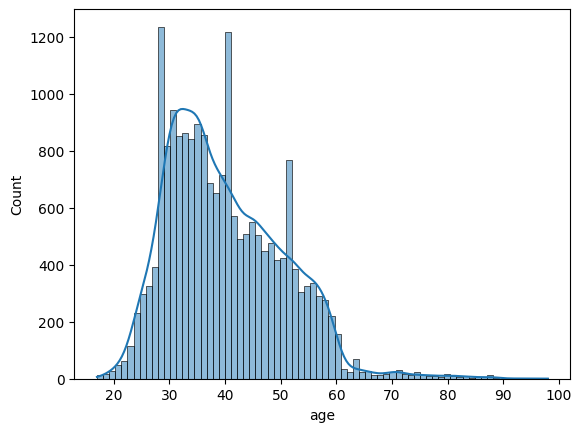

In [124]:
'''Data visualization to spot outliers'''
sns.histplot(data=sampled_bank_data, x='age',kde=True)




<class 'pandas.core.frame.DataFrame'>
Index: 19778 entries, 32884 to 25869
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        19778 non-null  int64 
 1   job        19778 non-null  object
 2   marital    19778 non-null  object
 3   education  19778 non-null  object
 4   default    19778 non-null  object
 5   housing    19778 non-null  object
 6   loan       19778 non-null  object
 7   y          19778 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


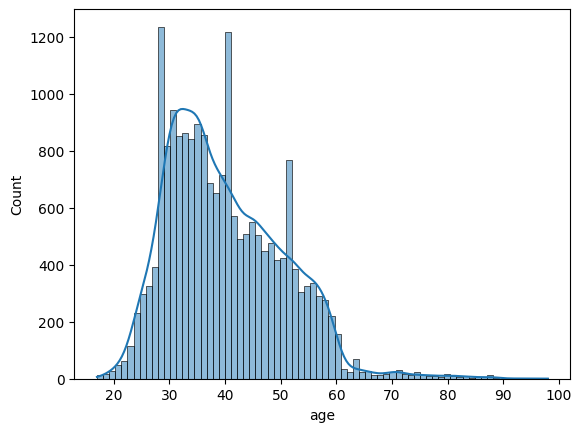

In [125]:
# Removing outliers using IQR technique
Q1 = sampled_bank_data['age'].quantile(0.25)
Q3 = sampled_bank_data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
bank_data = sampled_bank_data[(sampled_bank_data['age'] >= lower_bound) & (sampled_bank_data['age'] <= upper_bound)]
sns.histplot(data=sampled_bank_data, x='age',kde=True)
bank_data.info()




In [128]:
# getting features and target
features = sampled_bank_data.drop('y', axis=1).columns.tolist()

X = sampled_bank_data[features]
y = sampled_bank_data['y']

In [129]:
# Encoding target feature
le = LabelEncoder()
y = le.fit_transform(y)

In [130]:
# Identifying categorical and numerical features
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [131]:

# Split the data into training and testing sets
# Reducing 50% the size of the for faster processing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)



In [132]:
X_train.head()

,age,job,marital,education,default,housing,loan
30396,38,admin.,single,university.degree,no,yes,no
18735,56,blue-collar,married,basic.6y,unknown,yes,no
2735,39,blue-collar,married,basic.6y,no,no,no
33216,34,admin.,married,high.school,no,yes,yes
22681,40,technician,single,university.degree,no,no,yes


In [133]:
X_test.head()

,age,job,marital,education,default,housing,loan
25645,40,technician,married,high.school,no,yes,no
6111,48,technician,married,basic.6y,no,no,yes
30580,32,self-employed,married,basic.6y,no,yes,no
10323,36,admin.,married,university.degree,no,yes,no
38777,67,retired,married,basic.4y,no,yes,no


In [134]:
y_train
y_test


array([0, 0, 0, ..., 0, 1, 0])

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [135]:
category_counts = sampled_bank_data['y'].value_counts()
print("Absolute Counts:")
print(category_counts)


Absolute Counts:
y
no     17772
yes     2228
Name: count, dtype: int64


In [136]:
# Define the baseline for an unbalance dataset
baseline_classifier = DummyClassifier(strategy='most_frequent')

# Calculate the proportions of each class
proportions = sampled_bank_data['y'].value_counts(normalize=True)

# Choosing the largest proportion as baseline
baseline_accuracy = proportions.max()

baseline_accuracy


0.8886

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [137]:
# Create a Selector
selector = make_column_selector(dtype_include=object)

# Create column transformer
transformer = make_column_transformer((OneHotEncoder(drop = 'first'), selector),
                                     remainder = StandardScaler())

# Select features
extractor = SelectFromModel(LogisticRegression(penalty='l1',
                                               solver = 'liblinear',
                                               random_state = 42))

lgr_pipe = Pipeline([('transformer', transformer),
                    ('selector', extractor),
                    ('lgr', LogisticRegression(random_state=42,
                                              solver='liblinear'))])

lgr_pipe.fit(X_train, y_train)
lgr_pipe



Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e7898754e00>)])),
                ('selector',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              random_state=42,
                                                              solver='liblinear'))),
                ('lgr',
                 LogisticRegression(random_state=42, solver='liblinear'))])

### Problem 9: Score the Model

What is the accuracy of your model?

In [138]:
# Getting Model's accuracy

pipe_1_acc = lgr_pipe.score(X_test, y_test)
print(f"lgr_pipe Accuracy: {pipe_1_acc * 100:.2f}")


lgr_pipe Accuracy: 88.88


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [139]:
X_train.head()

,age,job,marital,education,default,housing,loan
30396,38,admin.,single,university.degree,no,yes,no
18735,56,blue-collar,married,basic.6y,unknown,yes,no
2735,39,blue-collar,married,basic.6y,no,no,no
33216,34,admin.,married,high.school,no,yes,yes
22681,40,technician,single,university.degree,no,no,yes


In [140]:
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

# Define the models and hyperparameters
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [5, 10, 15]})
}

In [141]:
'''Getting performance results for each model'''
results = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])

    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)

    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

    # Get the best estimator
    best_model = grid_search.best_estimator_

    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    # Append the results
    results.append([name, train_score, test_score, fit_time])



In [142]:
# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['model', 'train score', 'test score', 'average fit time'])
results_df.set_index('model', inplace=True)

# Save to JSON (for submission if needed)
results_df.to_json('/content/drive/MyDrive/Colab Notebooks/Assignment_17_1/data/model_results.json')

In [143]:
# Save to JSON (for submission if needed)
results_df.to_json('/content/drive/MyDrive/Colab Notebooks/Assignment_17_1/data/model_results.json')

In [144]:
df = pd.read_json(r'/content/drive/MyDrive/Colab Notebooks/Assignment_17_1/data/model_results.json')
df

,train score,test score,average fit time
knn,0.892000,0.88450,6.440197
logisticregression,0.888625,0.88875,0.409090
svc,0.888562,0.88875,28.458015
decisiontreeclassifier,0.889875,0.88900,0.401046


In [145]:

'''Getting most important features'''

# Encoding columns for processing
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer object.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],
    remainder='drop'
)


In [146]:
# Create a pipeline that preprocesses data and selects features
feature_selection_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k=5))
])

# Train the pipeline
feature_selection_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan'])])),
                ('selector', SelectKBest(k=5))])

In [147]:
# Get the names of all features generated after preprocessing
# This requires accessing the one-hot encoder inside the preprocessor
ohe_feature_names = feature_selection_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_feature_names = numerical_columns + list(ohe_feature_names)

# Get the scores from the selector step
scores = feature_selection_pipeline.named_steps['selector'].scores_

# Create a DataFrame to display scores
scores_df = pd.DataFrame({
    'feature': all_feature_names,
    'score': scores
}).sort_values(by='score', ascending=False)

print(scores_df)

# Get the names of the top K selected features (using the mask from the selector)
selected_mask = feature_selection_pipeline.named_steps['selector'].get_support()
top_features = np.array(all_feature_names)[selected_mask]

print(f"\nTop 5 selected features: {list(top_features)}")


                          feature       score
25                     default_no  162.498153
26                default_unknown  162.213733
6                     job_retired  158.468090
9                     job_student  135.092253
2                 job_blue-collar   87.889308
15                 marital_single   48.059913
23    education_university.degree   36.144971
19             education_basic.9y   34.346736
14                marital_married   26.969597
8                    job_services   17.481307
0                             age   14.076396
1                      job_admin.   13.513448
24              education_unknown   11.539631
21           education_illiterate    8.417946
18             education_basic.6y    7.886210
3                job_entrepreneur    6.377227
31                        loan_no    4.497060
17             education_basic.4y    4.269803
33                       loan_yes    4.232349
13               marital_divorced    3.856344
11                 job_unemployed 

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [159]:
# Defining NEW hyperparameters
models_tuned = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7, 9], 'knn__weights': ['distance']}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10, 100]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10, 100], 'svc__kernel': ['poly', 'rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [5, 10, 15, 20]})
}

In [160]:
'''Getting performance results for each model'''
results_tuned = []

for name, (model, params) in models_tuned.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])

    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=3, n_jobs=-1)

    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

    # Get the best estimator
    best_model = grid_search.best_estimator_

    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    # Append the results
    results_tuned.append([name, train_score, test_score, fit_time])

In [161]:
# Create the results DataFrame
results_df_tuned = pd.DataFrame(results_tuned, columns=['model', 'train score', 'test score', 'average fit time'])
results_df_tuned.set_index('model', inplace=True)

# Save to JSON (for submission if needed)
results_df_tuned.to_json('/content/drive/MyDrive/Colab Notebooks/Assignment_17_1/data/model_results_tuned.json')

In [162]:
df = pd.read_json(r'/content/drive/MyDrive/Colab Notebooks/Assignment_17_1/data/model_results_tuned.json')
df

,train score,test score,average fit time
knn,0.928187,0.87250,5.563060
logisticregression,0.888625,0.88875,0.214594
svc,0.888562,0.88875,131.421571
decisiontreeclassifier,0.889875,0.88900,0.493588


In [ ]:
'''FINDINGS

After analysing the data with 4 different Machine Learning models commonly used
to perform data classification, it was found the most relevant factors that
affect success are: Job and Credit in Default.

For Job column, it was found that the campaigns were more effective among people
with these jobs/occupations: blue-collar, retired, and student

For the Default column, campaigns were more effective in people who did not have
credit in default.

Now, models used for this analysis, got prediction scores above a baseline
calculated based on the proportion of the different categories, which in our case
those would be 'Yes' or No' (accepted).

Finally, in order to identify the most relevant characteristics that affect success
we utilized an encoding method that allowed us to turn each option within each column
into another column, in order to be able to calculate the level of relevance
 it has for the final output, based on its frequency of occurrence.

 Next Steps and Recommendations:

 In order to apply some filtering to the groups of people identified by their
 job and credit default status, some more information be useful, like salary range,
 type of studies (e.,g., University, Highschool, etc), credit score,
 number of credits, etc.

 As recommendation, using more thoughful categories, that are better defined
 on clear differences, will improve a lot the inputs to the system and therefore
 the accuracy of the model.

'''

##### Questions